### Required libraries for this notebook:

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Handling

Let's read our data using pandas library:

In [2]:
titanic_df = pd.read_csv('train.csv')

Preview of the first few entries of our dataset:

In [3]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### Exploratory Visualization

The purpose of this demonstration was to analyze passenger distribution and whether certain factors played a role in the survival of the disaster including:

- Traveling class (Pclass)
- Sex
- Age

Let's take a look at traveling class and sex first:

In [4]:
# Plot different graphs together

fig = plt.figure(figsize=(24,12),dpi=1800)

# Distribution of passengers by sex

ax1 = plt.subplot2grid((2,4),(0,0))                                            
sns.countplot('Sex',data=titanic_df,palette='Set2')
plt.title('Distribution of passengers by sex')
plt.ylabel('Number of passengers')

# Distribution of passengers by class and gender

ax2 = plt.subplot2grid((2,4),(0,1))
sns.countplot('Sex',data=titanic_df,hue='Pclass')
plt.title('Ditribution of gender by class')
plt.ylabel('Number of passengers')

# Distribution of passengers per location by class

ax3 = plt.subplot2grid((2,4),(0,2))
sns.countplot('Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'])
plt.title('Passengers per location')
plt.ylabel('Number of passengers')

We'll explore the age distribution:

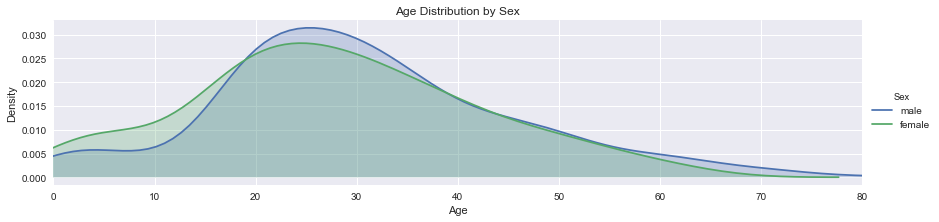

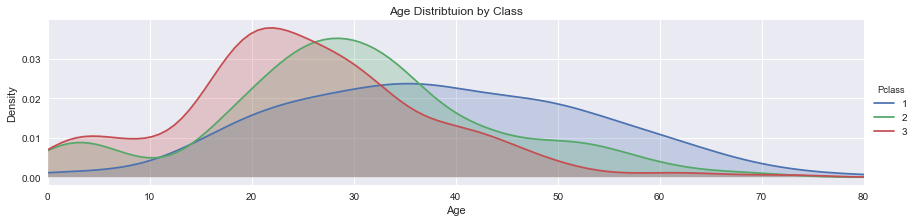

In [5]:
# Age by Sex

fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.title('Age Distribution by Sex')
plt.ylabel('Density')

# Age by Class

fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.title('Age Distribtuion by Class')
plt.ylabel('Density')

The common notion of "every man for himself" was replaced by "women and children first" as a code of conduct during the Titanic shipwreck. In our dataset, we do not have a category for children so we will create our own.

In [6]:
# Defining a new function for a child

def male_female_child(passenger):
    age,sex = passenger
    
    # Age requirement for being a child
    
    if age < 18:
        return 'child'
    else:
        return sex

In [7]:
# Modifying our dataset to include children using our previous function. 
# This will create a new column using parameters from our current dataset.

titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

# Preview of the new data list

titanic_df[0:10]

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  Person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male  
5      0            330877   8.4583   NaN        Q    male  
6      0             17463  51.8625   E46        S    male  
7      1            349909  21.0750   NaN        S   child  
8      2            347742  11.1333   NaN        S  female  
9      0            237736  30.0708   NaN        C   child

We'll re-examine our passenger distribtuion by class now with children:

In [8]:
# Counting the number of passengers onboard

titanic_df['Person'].value_counts()

male      519
female    259
child     113
Name: Person, dtype: int64

In [9]:
# Plot different graphs together

fig = plt.figure(figsize=(24,12),dpi=1800)

# Distribution of passengers by sex

ax1 = plt.subplot2grid((2,4),(0,0))                                            
sns.countplot('Sex',data=titanic_df,palette='Set2')
plt.title('Distribution of passengers by sex')
plt.ylabel('Number of passengers')

# Distribution of passengers by class 

ax2 = plt.subplot2grid((2,4),(0,1))
sns.countplot('Person',data=titanic_df,hue='Pclass')
plt.title('Traveling class by age')
plt.ylabel('Number of passengers')

# Distribution of passengers per location by class

ax3 = plt.subplot2grid((2,4),(0,2))
sns.countplot('Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'])
plt.title('Passengers per location')
plt.ylabel('Number of passengers')


Finally let's look at the age distribution of the passengers including children:

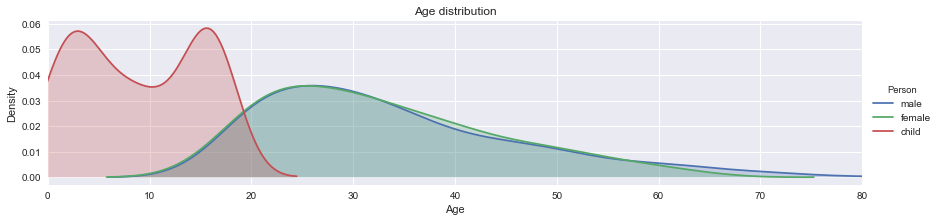

In [10]:
fig=sns.FacetGrid(titanic_df,hue='Person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()
plt.title('Age distribution')
plt.ylabel('Density')

### Survivability

Now that we have explored the differences in age, sex, and class of our passengers. We wil now explore if these factors affected the survivability outcome. However, we will add two new factors:

- Passenger is alone or with family
- Cabin location

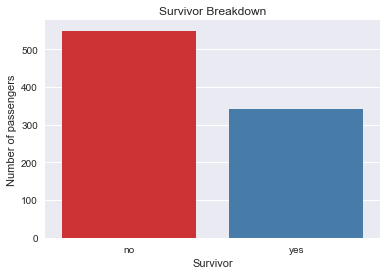

In [11]:
# Because in our dataset, surviving is noted in boolean value 0 or 1

titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})
sns.countplot('Survivor',data=titanic_df,palette='Set1')
plt.title('Survivor Breakdown')
plt.ylabel('Number of passengers')

Overall, more passengers did not survive the disaster. Let's take a look at our traveling factor whether the passenger was alone or with family.

In [12]:
# Counting the alone or with family factor. If the new column is 0, they were alone during the voyage

titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Users\Arthur\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Preview of the new column in our dataset:

In [13]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Person Survivor  \
0      0         A/5 21171   7.2500   NaN        S    male       no   
1      0          PC 17599  71.2833   C85        C  female      yes   
2      0  STON/O2. 3101282   7.9250   NaN        S  female      yes   
3      0            113803  53.1000  C123        S  female      yes   
4      0            373450   8.0500   NaN        S    male       no   

         Alone  
0  With Family  
1  With Family  
2        Alone  
3  With Family  
4        Alone

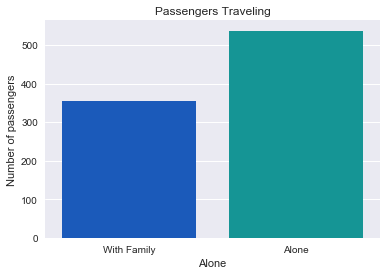

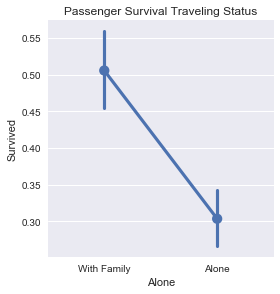

In [14]:
# Number of passengers traveling alone or with family

sns.countplot('Alone',data=titanic_df,palette='winter')
plt.title('Passengers Traveling')
plt.ylabel('Number of passengers')

# Survival rate of passenger traveling status

sns.factorplot('Alone','Survived',data=titanic_df)
plt.title('Passenger Survival Traveling Status')

Let's breakdown the survival rate of passengers based on person, age, and class:

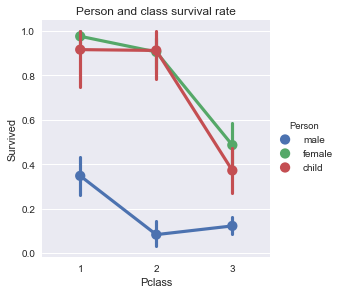

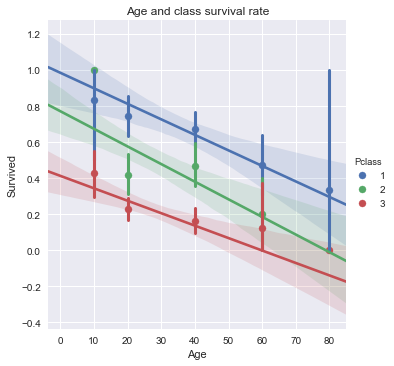

In [16]:
# Gender and class survival rate

sns.factorplot('Pclass','Survived',hue='Person',data=titanic_df)
plt.title('Person and class survival rate')

# Age and class survival rate

sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,x_bins=[10,20,40,60,80])
plt.title('Age and class survival rate')

Finally, the location of each cabin may contribute to the survival of each passenger; those closer to life-boat access may have had a higher chance of survival.

In [17]:
# Clean some of the cabin data as we have some null values

cabin_deck = titanic_df['Cabin'].dropna()

# Identifying the different cabin areas and rearrange beginning alphabetically

cabin_letter = []

for letter in cabin_deck:
    cabin_letter.append(letter[0]) # Append to the list for each cabin located in our dataset
    
alpha_cabin_letter = sorted(cabin_letter) # Sorting list alphabetically

cabin_df = DataFrame(alpha_cabin_letter)
cabin_df.columns = ['Cabin']

Determine if passenger survives based on cabin location:

In [18]:
# Create a new dataframe

cabin_survivor = titanic_df[['Survivor','Cabin']].dropna() 

# Extract the first letter of the cabin element 

cabin_survivor.Cabin = [cabin[0] for cabin in cabin_survivor.Cabin]

# Sorting the dataframe alphabetically by cabin

cabin_sort_survivor = cabin_survivor.sort_values('Cabin',ascending=True)

In [19]:
# Plot the different graphs together

fig = plt.figure(figsize=(24,12),dpi=1800)

# Distribution of passengers per cabin

ax1 = plt.subplot2grid((2,4),(0,0))                                            
sns.countplot('Cabin',data=cabin_df,palette='winter_d') 
plt.title('Distribution of passengers per cabin')
plt.ylabel('Number of passengers')

# Survival rate of passengers per cabin

ax2 = plt.subplot2grid((2,4),(0,1))
sns.countplot('Cabin',data=cabin_sort_survivor,hue='Survivor',palette='Set1')
plt.title('Survival rate of passengers per cabin')
plt.ylabel('Number of passengers')